<a href="https://colab.research.google.com/github/jain726/Deep-Learning/blob/Deep-Learning/%231_ANN_Iris_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Import all modules and libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split

In [14]:
# Instantiate a class named Model with 2 functions inside it
class Model(nn.Module):
  def __init__(self, in_features = 4, h1 = 8, h2 = 9, out_features = 3): # Fn to define layers
    super().__init__() # This line is always there
    self.fc1 = nn.Linear(in_features, h1) # Layers 1; Takes 4 inputs and sends them to 8 neurons
    self.fc2 = nn.Linear(h1, h2) # Layers 2; Takes input from 8 neurons and sends them to 9 neurons
    self.out = nn.Linear(h2, out_features) # Output Layer

  def forward(self, x): # Fn to move the data forward in the layers
    # Utilizes relu for forward propogation
    # Relu converts negative numbers to 0 and keeps the positive numbers as they are
    # This allows simplicity and speed in computing and helps in other ways as well
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [15]:
torch.manual_seed(42) # Set a seed
model = Model() # Call the model (On button)

In [16]:
# Read the data (Iris dataset)
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df = pd.read_csv(url)

In [17]:
# Assign dummy variables
df['variety'] = df['variety'].replace('Setosa', 0)
df["variety"] = df['variety'].replace('Versicolor', 1)
df["variety"] = df['variety'].replace('Virginica', 2)
df

<ipython-input-17-3c0f46a74ba0>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["variety"] = df['variety'].replace('Virginica', 2)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
# Assign X (features)
X = df.drop(columns = 'variety')
X = X.values
# Assign y (target variable)
y = df['variety']
y = y.values
# Assign training and testing variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# Make X data into float tensor (32-bit)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
# Make y data into long tensor (64-bit)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [19]:
# Establish Criterion to determine loss (loss function)
# nn.CrossEntropyLoss() - Multi-class classification
# nn.BCELoss() - Binary Classification with Sigmoid Ouput
# nn.BCEWithLogitsLoss() - Binary classification without manually applying sigmoid
# And more...
# In this case we use nn.CrossEntropyLoss() because we have 3 target labels (3 flowers)
criterion = nn.CrossEntropyLoss()
# Optimize the model's parameters (weights and biases) using gradients from loss.backward()
# Utilizing Adam optimizer in this situation
optimizer = torch.optim.Adam(model.parameters(), lr =0.01)

In [20]:
# Runs the model for a fixed number of iterations called epochs
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train) # Model prediction after passing X_train data using forward fn
  loss = criterion(y_pred, y_train) # Compare predicted y & actual y on the criterion (CrossEntropyLoss)
                                    # Returns how "wrong" the predictions are
  losses.append(loss.detach().numpy()) # list of all loss values in losses list
  if i%10 == 0:
    print(f'Epoch: {i}, Loss: {loss}')

  optimizer.zero_grad() # Clear previous gradients to avoid gradient stacking
  loss.backward() # Back propogation to determine new weights
  optimizer.step() # Applied new weights and gradients

Epoch: 0, Loss: 1.0846974849700928
Epoch: 10, Loss: 0.9178672432899475
Epoch: 20, Loss: 0.7620365023612976
Epoch: 30, Loss: 0.6275593042373657
Epoch: 40, Loss: 0.46693310141563416
Epoch: 50, Loss: 0.2876907289028168
Epoch: 60, Loss: 0.16747020184993744
Epoch: 70, Loss: 0.10634323954582214
Epoch: 80, Loss: 0.0805111899971962
Epoch: 90, Loss: 0.06965284049510956


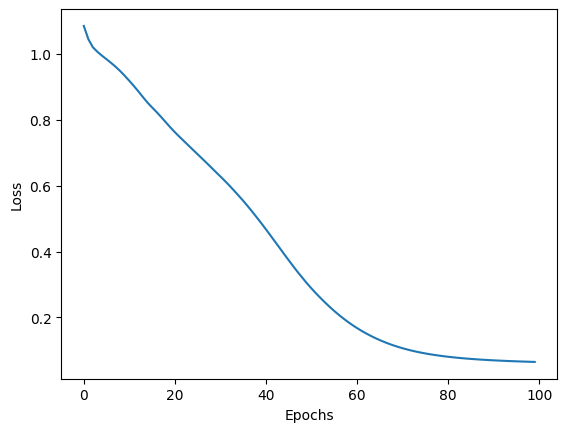

In [21]:
# Plot Loss against Epochs
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [22]:
with torch.no_grad(): # Temporarily disables gradient tracking
                      # Avoid shifting of gradients and just tests the test data
  y_eval = model.forward(X_test) # Model evaluated predictions on test data
  loss = criterion(y_eval, y_test) # Compares predicted y with actual y and gives loss/error

In [23]:
correct = 0
with torch.no_grad(): # Temporarily disables gradient tracking
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1})\t{str(y_val)}\t{y_val.argmax().item()}\t{y_test[i]}')
    if y_val.argmax().item() == y_test[i]:
      correct = correct + 1;
print(f"We got {correct} correct!")

1)	tensor([-1.4047,  6.3088,  2.6059])	1	1
2)	tensor([ 8.3873,  2.4565, -7.5105])	0	0
3)	tensor([-12.1550,   1.2180,  13.7084])	2	2
4)	tensor([-1.6694,  5.9208,  2.8609])	1	1
5)	tensor([-1.5830,  6.7488,  2.8363])	1	1
6)	tensor([ 7.8355,  2.3252, -6.9788])	0	0
7)	tensor([ 1.1226,  6.0539, -0.0397])	1	1
8)	tensor([-5.1951,  4.4495,  6.5238])	2	2
9)	tensor([-3.2498,  4.9141,  4.4721])	1	1
10)	tensor([0.5643, 6.5383, 0.5529])	1	1
11)	tensor([-4.3360,  4.7788,  5.6267])	2	2
12)	tensor([ 7.3510,  2.0547, -6.5259])	0	0
13)	tensor([ 8.1241,  2.3544, -7.2604])	0	0
14)	tensor([ 7.4812,  2.1052, -6.6496])	0	0
15)	tensor([ 7.8507,  2.2484, -7.0006])	0	0
16)	tensor([-1.3284,  6.5228,  2.5457])	1	1
17)	tensor([-8.2425,  2.4429,  9.6183])	2	2
18)	tensor([0.3340, 6.4646, 0.7730])	1	1
19)	tensor([-1.5835,  5.7637,  2.7534])	1	1
20)	tensor([-8.1610,  2.2921,  9.5194])	2	2
21)	tensor([ 7.2355,  2.0783, -6.4101])	0	0
22)	tensor([-3.9038,  4.6631,  5.1523])	2	2
23)	tensor([ 7.3376,  2.2768, -6.4930])	0	0


In [24]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])
with torch.no_grad():
  print(model(new_iris))

tensor([ 7.2972,  2.0339, -6.4748])
